In [1]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [28]:
# First we make a query to the database by applying filters 
qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==8)|(tables.samples.experiment_id==9)|(tables.samples.experiment_id==10))


qsss = qexp.filter(tables.plasmids.name=='pTet:RFP/std:YFP/std:CFP')
qpss = qexp.filter(tables.plasmids.name=='pTet:RFP/J23107:YFP/std:CFP')
qpts = qexp.filter(tables.plasmids.name=='pTet:RFP/pLacI:YFP/std:CFP')
qpls = qexp.filter(tables.plasmids.name=='pTet:RFP/pLas81:YFP/std:CFP')

dfexp=psql.read_sql_query(qexp.selectable, registry.engine)
dfsss = psql.read_sql_query(qsss.selectable, registry.engine)
dfsss.head()


supplements_concentration inducers_name  measurements_id measurements_name  \
0                        0.0        Layout           223491         OD600:600   
1                        0.0        Layout           223492         OD600:600   
2                        0.0        Layout           223493         OD600:600   
3                        0.0        Layout           223494         OD600:600   
4                        0.0        Layout           223495         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.085           0.194444                     675         675   
1               0.084           0.194444                     676         676   
2               0.084           0.194444                     677         677   
3               0.085           0.194444                     678         678   
4               0.085           0.194444                     679         679   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      8            1            3    M9-glucosa            8   
1                      8            1            4    M9-glucosa            8   
2                      8            1            5    M9-glucosa            8   
3                      8            1            6    M9-glucosa            8   
4                      8            1            7    M9-glucosa            8   

              plasmids_name cells_strain  experiments_id    experiments_name  \
0  pTet:RFP/std:YFP/std:CFP        Top10               8  cinetica 2 rep 1 1   
1  pTet:RFP/std:YFP/std:CFP        Top10               8  cinetica 2 rep 1 1   
2  pTet:RFP/std:YFP/std:CFP        Top10               8  cinetica 2 rep 1 1   
3  pTet:RFP/std:YFP/std:CFP        Top10               8  cinetica 2 rep 1 1   
4  pTet:RFP/std:YFP/std:CFP        Top10               8  cinetica 2 rep 1 1   

   experiments_machine  
0  Synergy HTX15070916  
1  Synergy HTX15070916  
2  Synergy HTX15070916  
3  Synergy HTX15070916  
4  Synergy HTX15070916

In [12]:
dfpss = psql.read_sql_query(qpss.selectable, registry.engine)
dfpss.head()


supplements_concentration inducers_name  measurements_id measurements_name  \
0                        0.0        Layout           223496         OD600:600   
1                        0.0        Layout           223497         OD600:600   
2                        0.0        Layout           223498         OD600:600   
3                        0.0        Layout           223499         OD600:600   
4                        0.0        Layout           223500         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.086           0.194444                     680         680   
1               0.085           0.194444                     681         681   
2               0.086           0.194444                     682         682   
3               0.085           0.194444                     683         683   
4               0.085           0.194444                     684         684   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      8            1            8    M9-glucosa            2   
1                      8            1            9    M9-glucosa            2   
2                      8            1           10    M9-glucosa            2   
3                      8            1           11    M9-glucosa            2   
4                      8            1           12    M9-glucosa            2   

                 plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/J23107:YFP/std:CFP        Top10               8   
1  pTet:RFP/J23107:YFP/std:CFP        Top10               8   
2  pTet:RFP/J23107:YFP/std:CFP        Top10               8   
3  pTet:RFP/J23107:YFP/std:CFP        Top10               8   
4  pTet:RFP/J23107:YFP/std:CFP        Top10               8   

     experiments_name  experiments_machine  
0  cinetica 2 rep 1 1  Synergy HTX15070916  
1  cinetica 2 rep 1 1  Synergy HTX15070916  
2  cinetica 2 rep 1 1  Synergy HTX15070916  
3  cinetica 2 rep 1 1  Synergy HTX15070916  
4  cinetica 2 rep 1 1  Synergy HTX15070916

In [13]:
dfpts = psql.read_sql_query(qpts.selectable, registry.engine)
dfpts.head()

supplements_concentration inducers_name  measurements_id measurements_name  \
0                        0.0        Layout           223515         OD600:600   
1                        0.0        Layout           223516         OD600:600   
2                        0.0        Layout           223517         OD600:600   
3                        0.0        Layout           223518         OD600:600   
4                        0.0        Layout           223519         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.085           0.194444                     699         699   
1               0.085           0.194444                     700         700   
2               0.086           0.194444                     701         701   
3               0.086           0.194444                     702         702   
4               0.085           0.194444                     703         703   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      8            3            3    M9-glucosa            1   
1                      8            3            4    M9-glucosa            1   
2                      8            3            5    M9-glucosa            1   
3                      8            3            6    M9-glucosa            1   
4                      8            3            7    M9-glucosa            1   

                plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/pLacI:YFP/std:CFP        Top10               8   
1  pTet:RFP/pLacI:YFP/std:CFP        Top10               8   
2  pTet:RFP/pLacI:YFP/std:CFP        Top10               8   
3  pTet:RFP/pLacI:YFP/std:CFP        Top10               8   
4  pTet:RFP/pLacI:YFP/std:CFP        Top10               8   

     experiments_name  experiments_machine  
0  cinetica 2 rep 1 1  Synergy HTX15070916  
1  cinetica 2 rep 1 1  Synergy HTX15070916  
2  cinetica 2 rep 1 1  Synergy HTX15070916  
3  cinetica 2 rep 1 1  Synergy HTX15070916  
4  cinetica 2 rep 1 1  Synergy HTX15070916

In [14]:
dfpls = psql.read_sql_query(qpls.selectable, registry.engine)
dfpls.head()

supplements_concentration inducers_name  measurements_id measurements_name  \
0                        0.0        Layout           223520         OD600:600   
1                        0.0        Layout           223521         OD600:600   
2                        0.0        Layout           223522         OD600:600   
3                        0.0        Layout           223523         OD600:600   
4                        0.0        Layout           223524         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.085           0.194444                     704         704   
1               0.085           0.194444                     705         705   
2               0.085           0.194444                     706         706   
3               0.085           0.194444                     707         707   
4               0.086           0.194444                     708         708   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      8            3            8    M9-glucosa            9   
1                      8            3            9    M9-glucosa            9   
2                      8            3           10    M9-glucosa            9   
3                      8            3           11    M9-glucosa            9   
4                      8            3           12    M9-glucosa            9   

                 plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/pLas81:YFP/std:CFP        Top10               8   
1  pTet:RFP/pLas81:YFP/std:CFP        Top10               8   
2  pTet:RFP/pLas81:YFP/std:CFP        Top10               8   
3  pTet:RFP/pLas81:YFP/std:CFP        Top10               8   
4  pTet:RFP/pLas81:YFP/std:CFP        Top10               8   

     experiments_name  experiments_machine  
0  cinetica 2 rep 1 1  Synergy HTX15070916  
1  cinetica 2 rep 1 1  Synergy HTX15070916  
2  cinetica 2 rep 1 1  Synergy HTX15070916  
3  cinetica 2 rep 1 1  Synergy HTX15070916  
4  cinetica 2 rep 1 1  Synergy HTX15070916

In [15]:
# Here are the unique measurement names in our dataframe
pnames = dfexp['plasmids_name'].unique()
mnames = dfexp['measurements_name'].unique()
mednames = dfexp['samples_media'].unique()

print pnames
print mnames
print mednames


[u'pTet:RFP/std:YFP/std:CFP' u'pTet:RFP/J23107:YFP/std:CFP'
 u'pTet:RFP/pLacI:YFP/std:CFP' u'pTet:RFP/pLas81:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
[u'M9-glucosa' u'M9-glicerol']


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


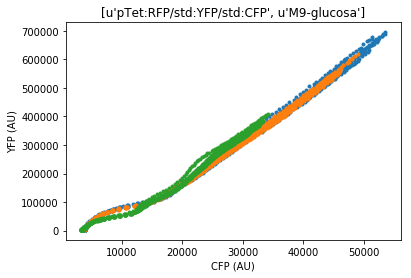

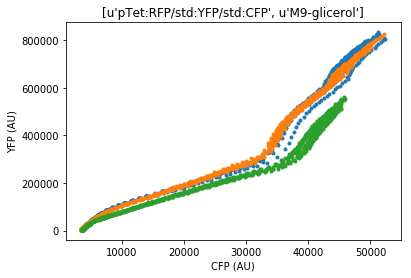

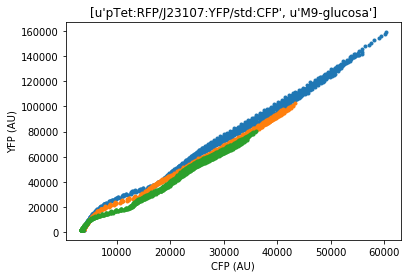

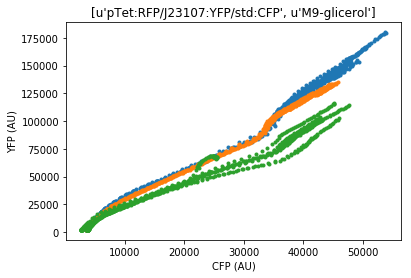

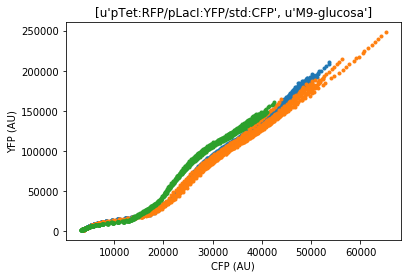

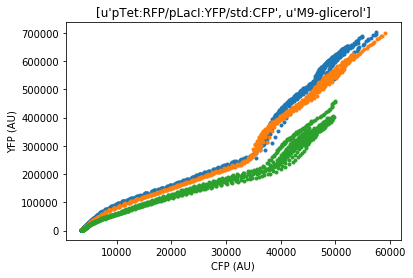

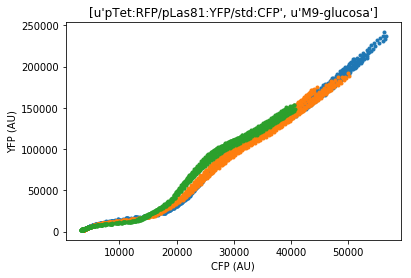

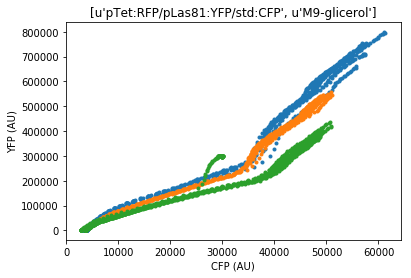

In [17]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('CFP (AU)')
        plt.ylabel('YFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


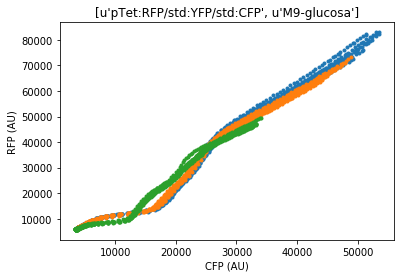

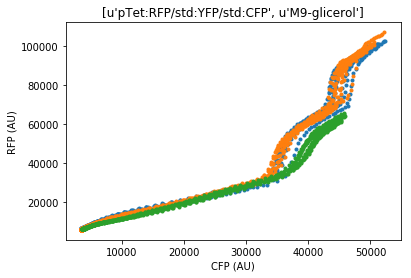

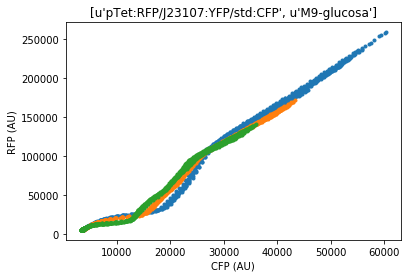

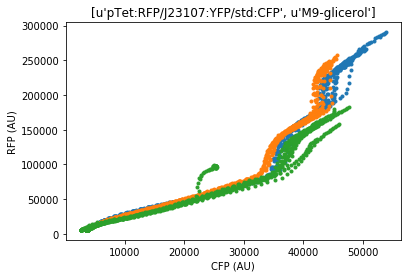

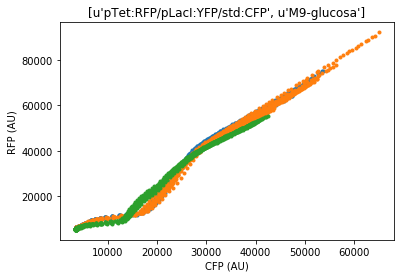

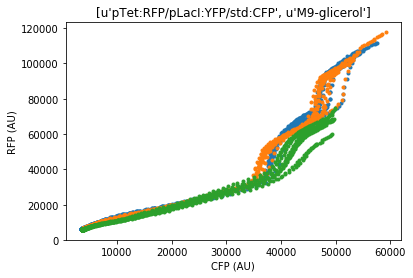

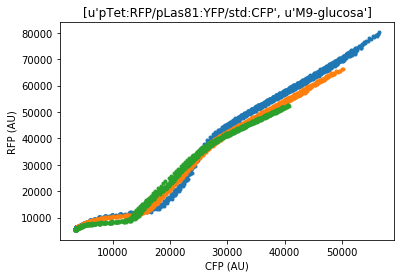

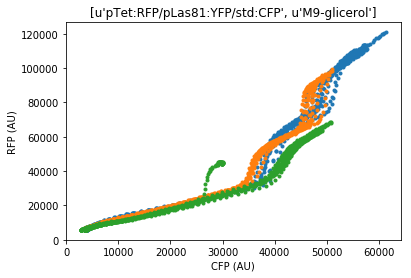

In [18]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('CFP (AU)')
        plt.ylabel('RFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


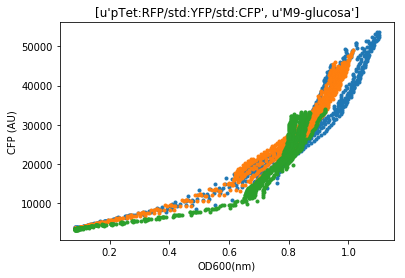

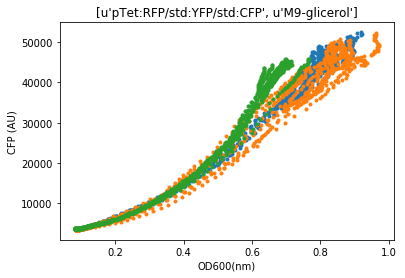

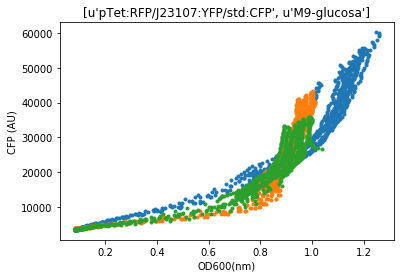

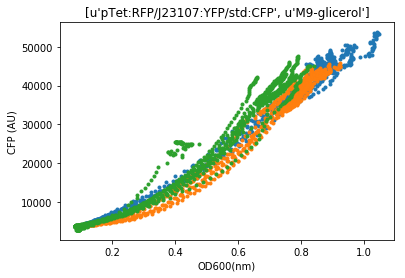

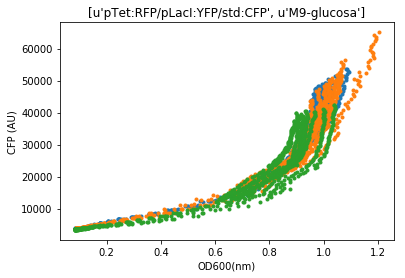

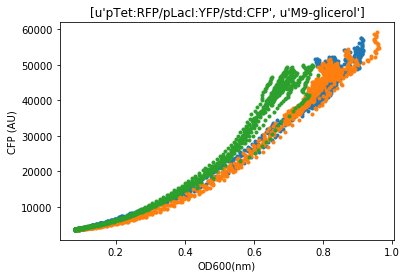

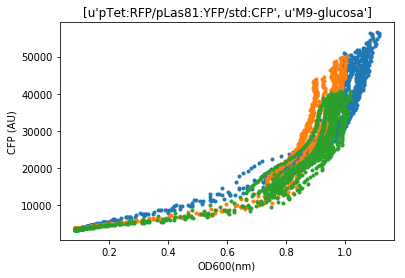

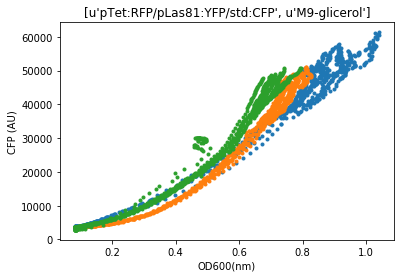

In [19]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('CFP (AU)')


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


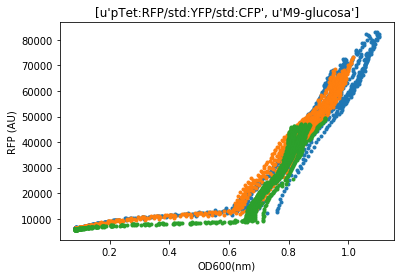

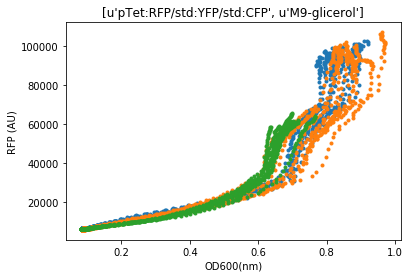

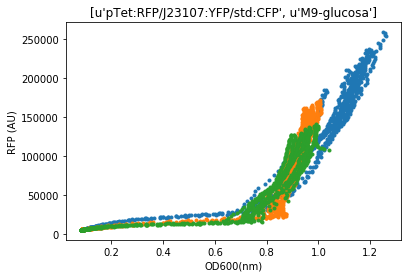

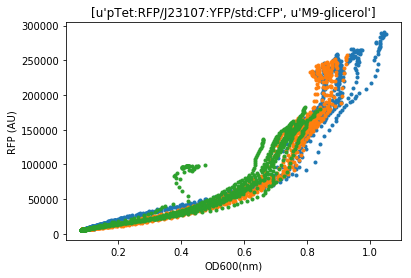

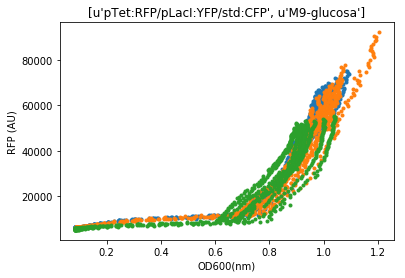

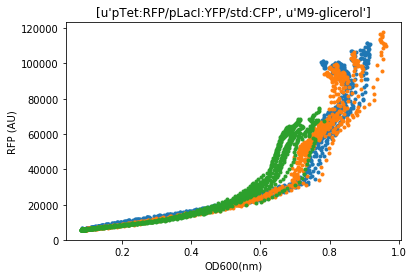

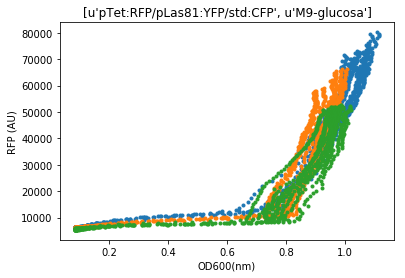

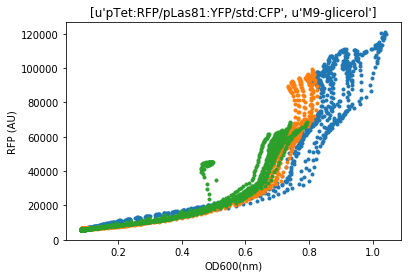

In [20]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('RFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


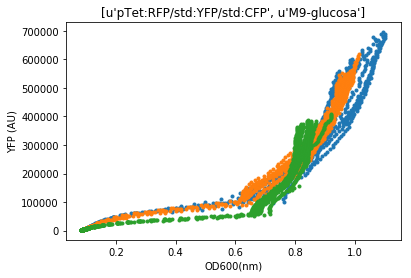

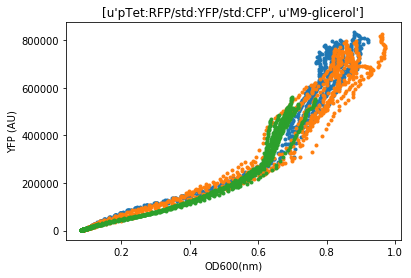

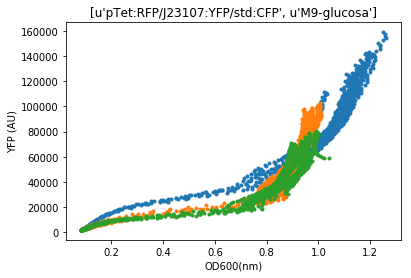

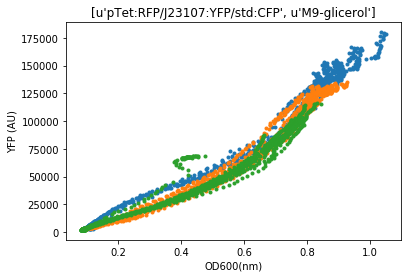

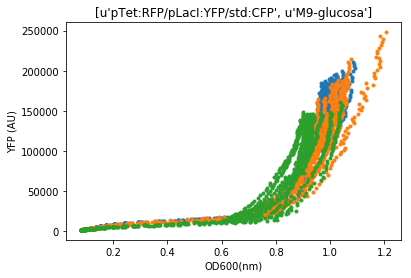

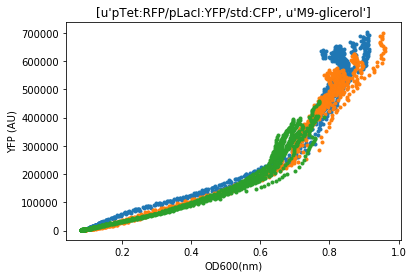

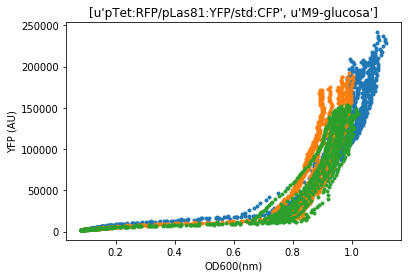

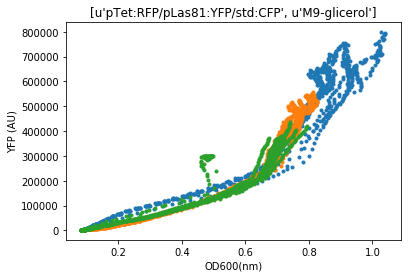

In [21]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('YFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


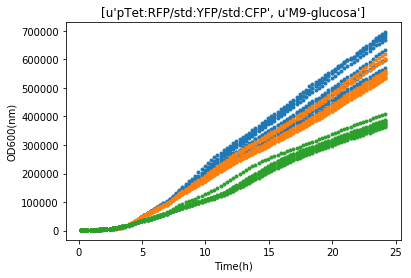

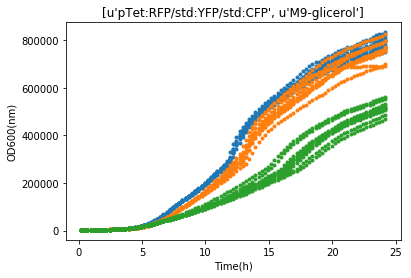

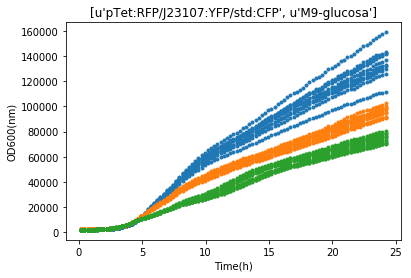

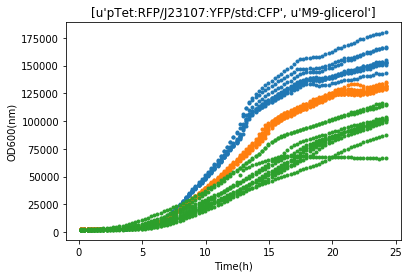

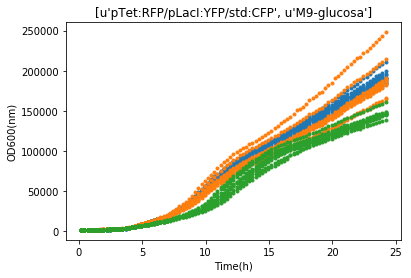

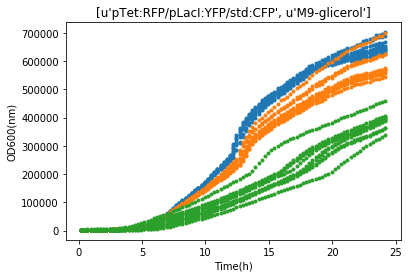

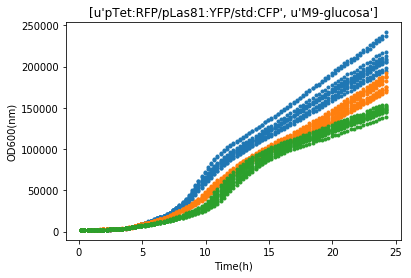

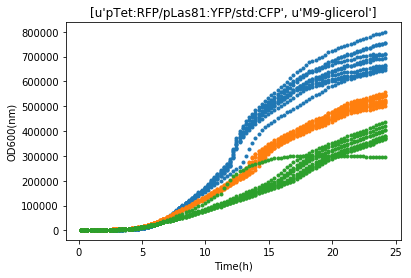

In [22]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('OD600(nm)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


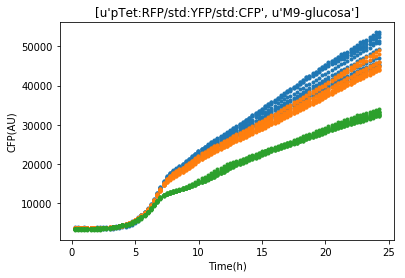

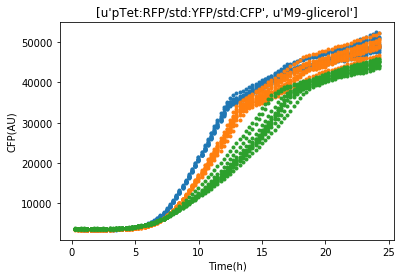

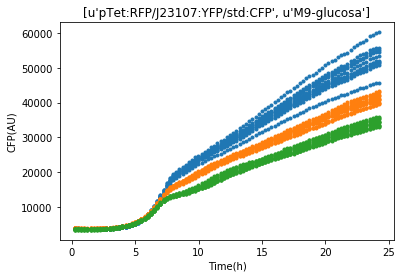

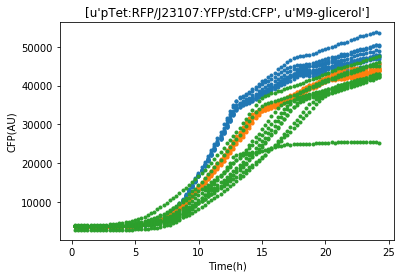

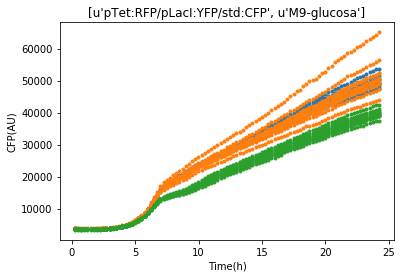

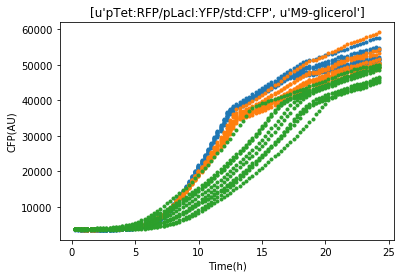

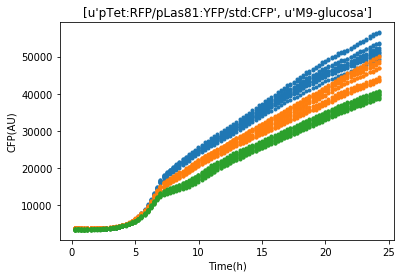

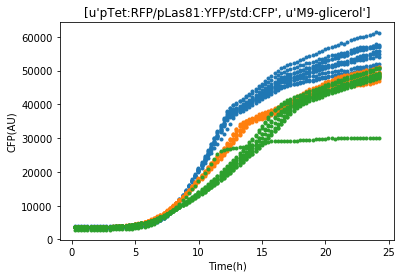

In [23]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('CFP(AU)')
       

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


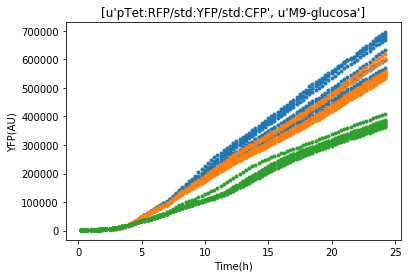

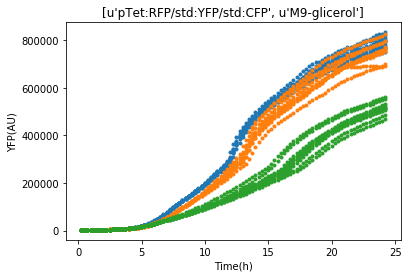

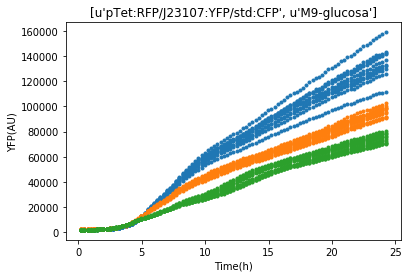

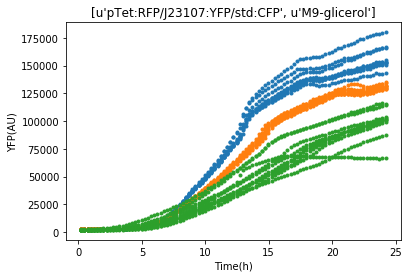

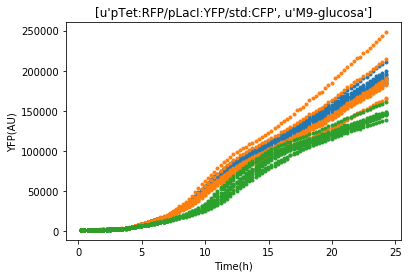

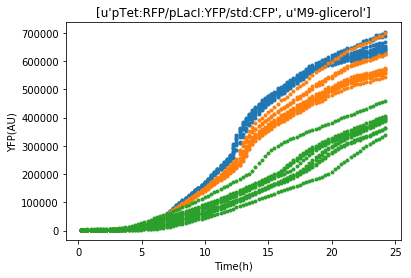

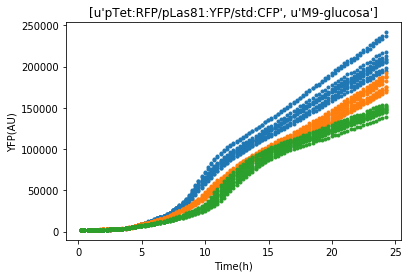

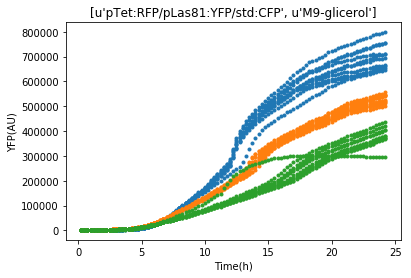

In [24]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('YFP(AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


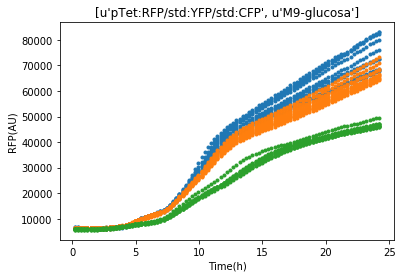

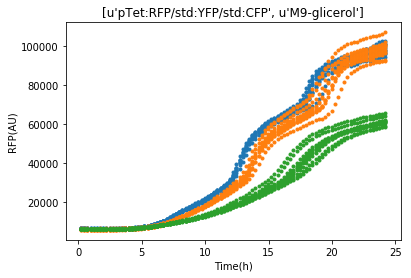

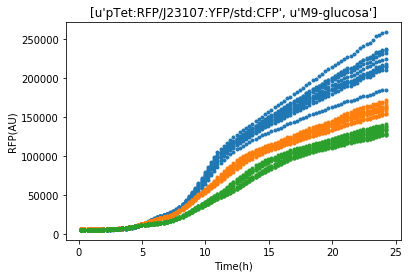

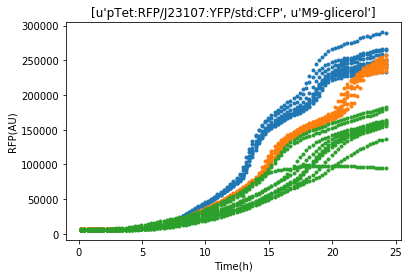

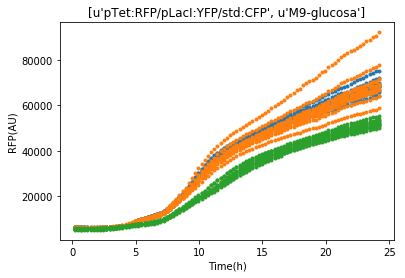

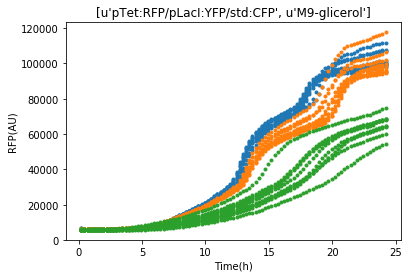

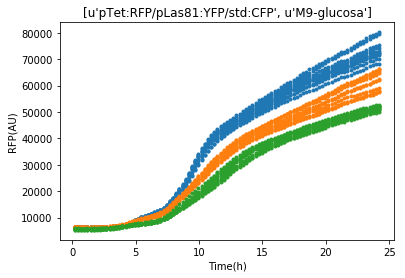

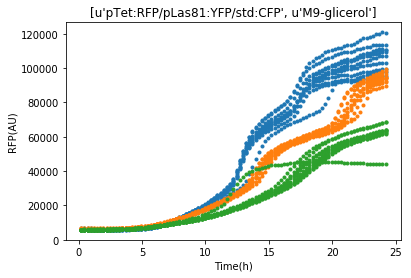

In [25]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==8][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==9][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==10][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('RFP(AU)')

In [29]:
#max mediciones(no diff)

odmax = np.max(dfexp[dfexp.measurements_name=='OD600:600']['measurements_value'].values)
print odmax
yfpmax = np.max(dfexp[dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'].values)
print yfpmax
rfpmax = np.max(dfexp[dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'].values)
print rfpmax
cfpmax = np.max(dfexp[dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'].values)
print cfpmax

1.259
833097.0
290295.0
65086.0


In [30]:
measmax = {}
for e in mednames:
    for m in mnames:
        measmax[e,m] = np.max(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e]['measurements_value'].values)
        print [e,m],measmax[e,m]
        print '---'


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[u'M9-glucosa', u'OD600:600'] 1.259
---
[u'M9-glucosa', u'CFP:420/50,485/20'] 65086.0
---
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] 259245.0
---
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] 695415.0
---
[u'M9-glicerol', u'OD600:600'] 1.049
---
[u'M9-glicerol', u'CFP:420/50,485/20'] 61334.0
---
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] 290295.0
---
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] 833097.0
---


In [31]:
ddif={}
for p in pnames:
    for m in mnames:
        for e in mednames:
            dfe=dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p]
            ddif[p,m,e]=analysis.compute_measurement_diff(dfe,m)
            print [p,m,e],ddif[p,m,e]
            print'---'

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


[u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'] [ 0.     0.     0.    ...,  0.    -0.001  0.   ]
---
[u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'] [ 0.     0.     0.    ...,  0.     0.     0.001]
---
[u'pTet:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glucosa'] [   0.    0.  -79. ...,  188.  321.  113.]
---
[u'pTet:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'] [   0.    0.  -56. ...,  167.  315.  122.]
---
[u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glucosa'] [   0.    0.  -84. ...,  246.  194.  379.]
---
[u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'] [   0.    0.  -22. ...,  313.  507.  316.]
---
[u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:500/27,540/25', u'M9-glucosa'] [    0.     0.    28. ...,  2738.  4048.  4690.]
---
[u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:500/27,540/25', u'M9-glicerol'] [    0.     0.   101. ...,  3627.  5111.  5757.]
---
[u'pTet:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glucosa'

In [32]:
measdiffsss = {}

print pnames[0]
for m in mnames:
    for e in mednames:
        measdiffsss[e,m] =analysis.compute_measurement_diff(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m)
        print [e,m],measdiffsss[e,m]
        
sssdiff=measdiffsss

print'----'
print pnames[1]
measdiffpss = {}

for e in mednames:
    for m in mnames:
        measdiffpss[e,m] =analysis.compute_measurement_diff(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m)
        print [e,m],measdiffpss[e,m]  
#print measdiffpss
pssdiff=measdiffpss

print'----'
print pnames[2]
measdiffpts = {}

for e in mednames:
    for m in mnames:
        measdiffpts[e,m] =analysis.compute_measurement_diff(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m)
        print [e,m],measdiffpts[e,m]
        
ptsdiff=measdiffpts

print'----'
print pnames[3]
measdiffpls = {}

for e in mednames:
    for m in mnames:
        measdiffpls[e,m] =analysis.compute_measurement_diff(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m)
        print [e,m],measdiffpls[e,m]   
    
#print measdiffpls
plsdiff=measdiffpls

diffs=[measdiffsss,measdiffpss,measdiffpts,measdiffpls]




pTet:RFP/std:YFP/std:CFP


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ...,  0.    -0.001  0.   ]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ...,  0.     0.     0.001]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -79. ...,  188.  321.  113.]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -56. ...,  167.  315.  122.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0.  -84. ...,  246.  194.  379.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [   0.    0.  -22. ...,  313.  507.  316.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.    28. ...,  2738.  4048.  4690.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.   101. ...,  3627.  5111.  5757.]
----
pTet:RFP/J23107:YFP/std:CFP
[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ..., -0.004 -0.005 -0.002]


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -76. ...,  304.  282.  146.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [    0.     0.  -104. ...,   271.  1393.   873.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [   0.    0.    2. ...,  584.  383.  730.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.    -0.001 ...,  0.005  0.     0.002]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -23. ...,  204.  232.  211.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [    0.     0.   -59. ...,  1581.   822.  1418.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.   -15. ...,   878.   765.  1079.]
----
pTet:RFP/pLacI:YFP/std:CFP
[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.001 ..., -0.001 -0.003 -0.001]


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -44. ...,  444.  230.  263.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0.  -73. ...,  521.  176.  348.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.   -26. ...,  1787.   996.  1928.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ..., -0.002 -0.003 -0.002]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -17. ...,  335.  275.  218.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [   0.    0.  -82. ...,  635.  433.  501.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.    51. ...,  4207.  4873.  4021.]
----
pTet:RFP/pLas81:YFP/std:CFP


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ...,  0.    -0.004  0.001]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -74. ...,  473.  315.  221.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0. -127. ...,  309.  279.  386.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.   -18. ...,  1489.  1017.  1544.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ...,  0.001  0.001  0.002]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -39. ...,  251.  497.   69.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [   0.    0.  -60. ...,  548.  458.  448.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.    56. ...,  4192.  4805.  4872.]


In [33]:
#max de diffs para rangos de H(x)
diffod={}
maxod={}
for e in mednames:
    for m in mnames:
        diffod[e,m] =analysis.compute_measurement_diff(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e],m)
        maxod[e,m]=np.max(diffod[e,m])
        print [e,m],maxod[e,m]


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[u'M9-glucosa', u'OD600:600'] 0.117
[u'M9-glucosa', u'CFP:420/50,485/20'] 1916.0
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] 7109.0
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] 13083.0
[u'M9-glicerol', u'OD600:600'] 0.053
[u'M9-glicerol', u'CFP:420/50,485/20'] 2180.0
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] 13937.0
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] 44065.0


In [34]:
#max de diffs para rangos de H(x)
diffod={}
maxod={}
for m in mednames:
    diffod[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'OD600:600')
    maxod[m]=np.max(diffod[m])
    
print maxod

diffrfp={}
maxrfp={}
for m in mednames:
    diffrfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'RFP-YFP:585/10,620/15')
    maxrfp[m]=np.max(diffrfp[m])
    
print maxrfp

diffyfp={}
maxyfp={}
for m in mednames:
    diffyfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'RFP-YFP:500/27,540/25')
    maxyfp[m]=np.max(diffyfp[m])
    
print maxyfp

diffcfp={}
maxcfp={}
for m in mednames:
    diffcfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'CFP:420/50,485/20')
    maxcfp[m]=np.max(diffcfp[m])
    
print maxcfp



{u'M9-glicerol': 0.052999999999999936, u'M9-glucosa': 0.11700000000000005}
{u'M9-glicerol': 13937.0, u'M9-glucosa': 7109.0}
{u'M9-glicerol': 44065.0, u'M9-glucosa': 13083.0}
{u'M9-glicerol': 2180.0, u'M9-glucosa': 1916.0}


In [35]:
Hod={}
Hcfp={}
Hrfp={}
Hyfp={}
for p in pnames:
    for m in mnames:
        for e in mednames:
            if m=='OD600:600':
                Hod[p,m,e] =analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,0.14])
                     
            elif m=='RFP-YFP:585/10,620/15':
                Hrfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,30900])
                      
            elif m=='RFP-YFP:500/27,540/25':
                Hyfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,79100])
                           
            else:
                Hcfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,3700])
                


print 'Entropy of OD', Hod
print 'Entropy of RFP', Hrfp           
print 'Entropy of YFP', Hyfp                
print 'Entropy of CFP', Hcfp

                                               

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Entropy of OD {(u'pTet:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8340664, (u'pTet:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8261256, (u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.536212, (u'pTet:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6548567, (u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.534152, (u'pTet:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6289291, (u'pTet:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.7709064, (u'pTet:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5976815}
Entropy of RFP {(u'pTet:RFP/J23107:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 5.5392694, (u'pTet:RFP/pLacI:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.2909999, (u'pTet:RFP/J23107:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 5.1280527, (u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.5520453, (u'pTet:RFP/std:YFP/std:CFP', u'RFP-YFP:5

In [36]:
Hodsss={}
Hcfpsss={}
Hrfpsss={}
Hyfpsss={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodsss[m,e] =analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,3700])
                    


print pnames[0]
print 'Entropy of OD', Hodsss
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfpsss
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfpsss
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfpsss
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pTet:RFP/std:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.536212, (u'OD600:600', u'M9-glucosa'): 4.534152}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.855515, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.4073615}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.5520453, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.214848}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 4.8396964, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 5.6686311}
---


In [37]:
Hodpss={}
Hcfppss={}
Hrfppss={}
Hyfppss={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpss[m,e] =analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,3700])
                    


print pnames[1]
print 'Entropy of OD', Hodpss
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppss
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppss
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppss
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pTet:RFP/J23107:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.6548567, (u'OD600:600', u'M9-glucosa'): 4.8340664}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.9397449, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.3733974}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 5.1280527, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 5.5392694}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 2.8426764, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 3.5385911}
---


In [38]:
Hodpts={}
Hcfppts={}
Hrfppts={}
Hyfppts={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpts[m,e] =analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,3700])
                    


print pnames[2]
print 'Entropy of OD', Hodpts
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppts
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppts
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppts
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pTet:RFP/pLacI:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.6289291, (u'OD600:600', u'M9-glucosa'): 4.8261256}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.9031992, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.5121531}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.6154678, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.2909999}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 3.6674922, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 5.3117895}
---


In [39]:
Hodpls={}
Hcfppls={}
Hrfppls={}
Hyfppls={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpls[m,e] =analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,3700])
                    


print pnames[3]
print 'Entropy of OD', Hodpls
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppls
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppls
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppls
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pTet:RFP/pLas81:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.5976815, (u'OD600:600', u'M9-glucosa'): 4.7709064}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.8537412, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.5220642}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.5817544, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.2817144}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 3.7663107, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 5.3338494}
---


In [40]:
def channel_entropies(df):
    # Calculate the entropies of all channels in the dataframe df
    Ho= {}
    Hr= {}
    Hy= {}
    Hc= {}
    
    mnames = df.measurements_name.unique()
    pnames = df.plasmids_name.unique()
    mednames = df.samples_media.unique()
    for p in pnames:
        for e in mednames:
            for m in mnames:
                if m=='OD600:600':
                    Ho[p,m,e] =analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,0.14])
                    
                else:
                    if m=='RFP-YFP:585/10,620/15':
                        Hr[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,30900])
                        
                    else:
                        if m=='RFP-YFP:500/27,540/25':
                            Hy[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,79100])
                            
                        else:
                            Hc[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,3700])
                            
    print Ho
    print' '
    print '---'
    print' '
    print Hc
    print' '
    print '---'
    print' '
    print Hr
    print' '
    print '---'
    print' '
    print Hy 
    


Hexp= channel_entropies(dfexp)
print Hexp


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{(u'pTet:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8340664, (u'pTet:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8261256, (u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.536212, (u'pTet:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6548567, (u'pTet:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.534152, (u'pTet:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6289291, (u'pTet:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.7709064, (u'pTet:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5976815}
 
---
 
{(u'pTet:RFP/J23107:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.3733974, (u'pTet:RFP/pLacI:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.5121531, (u'pTet:RFP/J23107:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glucosa'): 5.9397449, (u'pTet:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glucosa'): 5.855515, (u'pTet:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.4073615,

In [41]:
'''def channel_conditional_entropy(df, m1, m2, nbins, hrange):
    # Compute the conditional entropy H(m2|m1),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = compute_measurement_diff(df, m1)
    values2 = compute_measurement_diff(df, m2)
    # Compute the entropy
    density2d = prob_density2d(values1, values2, nbins, hrange)
    return conditional_entropy(density2d)'''



Hyo=analysis.channel_conditional_entropy(dfsss, 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
print 'H(dY|dlogOD)=',Hyo

print mnames

H(dY|dlogOD)= 4.54288
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']


In [42]:
Hcosss={}
Hrosss={}
Hyosss={}
for e in mednames:
    Hcosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600','CFP:420/50,485/20',[256,256], [[0,0.14],[0,3700]])
    Hrosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600', 'RFP-YFP:585/10,620/15',[256,256], [[0,0.14],[0,30900]])
    Hyosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
    print pnames[0]
    print 'H(dC|dlogOD)=',[e],Hcosss[e]
    print 'H(dRC|dlogOD)=',[e],Hrosss[e]
    print 'H(dY|dlogOD)=',[e],Hyosss[e]
    print '---'
    print ' '
                
              

pTet:RFP/std:YFP/std:CFP
H(dC|dlogOD)= [u'M9-glucosa'] 4.63268
H(dRC|dlogOD)= [u'M9-glucosa'] 2.96324
H(dY|dlogOD)= [u'M9-glucosa'] 4.02618
---
 
pTet:RFP/std:YFP/std:CFP
H(dC|dlogOD)= [u'M9-glicerol'] 4.97735
H(dRC|dlogOD)= [u'M9-glicerol'] 3.44895
H(dY|dlogOD)= [u'M9-glicerol'] 4.42754
---
 


In [43]:
Hco={}
Hro={}
Hyo={}
for p in pnames:
    for e in mednames:
        Hco[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600','CFP:420/50,485/20',[256,256], [[0,0.14],[0,3700]])
        Hro[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600', 'RFP-YFP:585/10,620/15',[256,256], [[0,0.14],[0,30900]])
        Hyo[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
        print 'H(dC|dlogOD)=',[p,e],Hco[p,e]
        print 'H(dR|dlogOD)=',[p,e],Hro[p,e]
        print 'H(dY|dlogOD)=',[p,e],Hyo[p,e]
        print '---'
        print ' '
                
                

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


H(dC|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 4.63268
H(dR|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 2.96324
H(dY|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 4.02618
---
 
H(dC|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 4.97735
H(dR|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 3.44895
H(dY|dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 4.42754
---
 
H(dC|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 4.54052
H(dR|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 4.03059
H(dY|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 2.2474
---
 
H(dC|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 4.94546
H(dR|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 4.33244
H(dY|dlogOD)= [u'pTet:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 2.65692
---
 
H(dC|dlogOD)= [u'pTet:RFP/pLacI:YFP/std:CFP', u'M9-glucosa'] 4.51042
H(dR|dlogOD)= [u'pTet:RFP/pLacI:YFP/std:CFP', u'M9-glucosa'] 2.92911
H(dY|dlogOD

In [44]:
def channel_conditional_entropy3(df, m1, m2, m3, nbins, hrange):
    # Compute the conditional entropy H(m2|m1,m3),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = analysis.compute_measurement_diff(df, m1)
    values2 = analysis.compute_measurement_diff(df, m2)
    values3 = analysis.compute_measurement_diff(df, m3)
    # Compute the entropy
    density3d = analysis.prob_density3d(values1, values2,values3, nbins, hrange)
    return analysis.conditional_entropy(density3d)


In [45]:
Hcyr={}
Hcyo={}
Hcro={}

Hycr={}
Hyco={}
Hyro={}

Hrcy={}
Hrco={}
Hryo={}

for p in pnames:
    for e in mednames:
        Hcyr[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hcyo[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hcro[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:585/10,620/15','CFP:420/50,485/20', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hycr[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hyco[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hyro[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hrcy[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hrco[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hryo[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        
        print 'H(dC|dY,dR)=',[p,e],Hcyr[p,e]
        print 'H(dC|dY,dlogOD)=',[p,e],Hcyo[p,e]
        print 'H(dC|dR,dlogOD)=',[p,e],Hcro[p,e]
        print ' '
        print 'H(dY|dC,dR)=',[p,e],Hycr[p,e]
        print 'H(dY|dC,dlogOD)=',[p,e],Hyco[p,e]
        print 'H(dY|dR,dlogOD)=',[p,e],Hyro[p,e]
        print ' '
        print 'H(dR|dC,dY)=',[p,e],Hrcy[p,e]
        print 'H(dR|dC,dlogOD)=',[p,e],Hrco[p,e]
        print 'H(dR|dY,dlogOD)=',[p,e],Hryo[p,e]
        print '---'
        print '---'
        print ' '
        

        

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match 

H(dC|dY,dR)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 1.02993
H(dC|dY,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.482623
H(dC|dR,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.751484
 
H(dY|dC,dR)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 3.86021
H(dY|dC,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 3.38317
H(dY|dR,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 3.07604
 
H(dR|dC,dY)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 1.40803
H(dR|dC,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 1.48792
H(dR|dY,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.911782
---
---
 
H(dC|dY,dR)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 1.08303
H(dC|dY,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 0.535468
H(dC|dR,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 0.955639
 
H(dY|dC,dR)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 3.84569
H(dY|dC,dlogOD)= [u'pTet:RFP/std:YFP/std:CFP', u'M9-glicerol'] 3.59615
H(dY|dR,dlogOD

In [ ]:
def channel_conditional_entropy4(df, m1, m2, m3, m4, nbins, hrange):
    # Compute the conditional entropy H(m2|m1,m3,m4),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = analysis.compute_measurement_diff(df, m1)
    values2 = analysis.compute_measurement_diff(df, m2)
    values3 = analysis.compute_measurement_diff(df, m3)
    values4 = analysis.compute_measurement_diff(df, m4)
    # Compute the entropy
    density4d = analysis.prob_density4d(values1, values2, values3, values4, nbins, hrange)
    return analysis.conditional_entropy(density4d)


for p in pnames:
    for e in mednames:
        Hcyro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p],'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        print 'H(dC|dY,dR,dlogOD)=',[p,e],Hcyro[p,e]


In [ ]:
Hcyro={}
Hycro={}
Hrcyo={}

for p in pnames:
    for e in mednames:
        Hcyro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        Hycro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        Hrcyo[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        
        print 'H(dC|dY,dR,dlogOD)=',[p,e],Hcyro[p,e]
        print ' '
        print 'H(dY|dC,dR,dlogOD)=',[p,e],Hycro[p,e]
        print ' '
        print 'H(dR|dC,dY,dlogOD)=',[p,e],Hrcyo[p,e]
        print '---'
        print '---'
        print ' '
        
